## Initial imports

In [1]:
from scm.plams import *
from ase import Atoms
from ase.visualize.plot import plot_atoms

# Before running AMS jobs, you need to call init()
init()

PLAMS working folder: /home/spiering/prog/ams_fix2023/scripting/scm/plams/doc/source/examples/AMSCalculator/plams_workdir


## Construct a charged ion
Create a charged ion using using `ase.Atoms` and setting the `info` dictionairy.

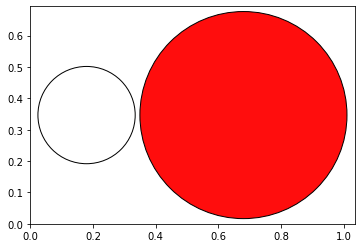

In [2]:
atoms = Atoms('OH',
              positions = [[1.0,0.0,0.0],[0.0,0.0,0.0]]
             )
#define a total charge
atoms.info['charge'] = -1

plot_atoms(atoms, scale=0.5);

## Set the AMS settings

First, set the AMS settings as you normally would do:

In [3]:
settings = Settings()
settings.input.ADF #Use ADF with the default settings
settings.input.ams.Task = "SinglePoint"

## Run AMS

In [4]:
calc = AMSCalculator(settings = settings, name='total_charge')
atoms.calc = calc

atoms.get_potential_energy() #calculate the energy of a charged ion

[22.02|16:58:59] JOB total_charge1 STARTED
[22.02|16:58:59] JOB total_charge1 RUNNING
[22.02|16:59:00] JOB total_charge1 FINISHED
[22.02|16:59:00] JOB total_charge1 SUCCESSFUL


-8.325219526819573

AMS used the following input file:

In [5]:
print(calc.amsresults.job.get_input())

Task SinglePoint

system
  Atoms
              O       1.0000000000       0.0000000000       0.0000000000 
              H       0.0000000000       0.0000000000       0.0000000000 
  End
  Charge -1.0
End

Engine ADF
EndEngine




## Construct a charged ion with atomic charges

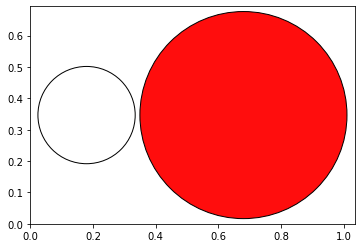

In [6]:
atoms = Atoms('OH',
              positions = [[1.0,0.0,0.0],[0.0,0.0,0.0]],
              charges = [-1, 0]
             )

plot_atoms(atoms, scale=0.5);

## Run AMS 

In [7]:
calc = AMSCalculator(settings = settings, name='atomic_charges')
atoms.calc = calc

atoms.get_potential_energy() #calculate the energy of a charged ion

[22.02|16:59:00] JOB atomic_charges1 STARTED
[22.02|16:59:00] Job atomic_charges1 previously run as total_charge1, using old results
[22.02|16:59:00] JOB atomic_charges1 COPIED


-8.325219526819573

AMS only considers the total charge of the system and not the individual atomic charges. PLAMS thus reuses the results of the previous calculation since the calculation is for the same chemical system. Both input options are allowed. If both input options are used, the total charge is the sum of both.

In [8]:
print(calc.amsresults.job.get_input())

Task SinglePoint

system
  Atoms
              O       1.0000000000       0.0000000000       0.0000000000 
              H       0.0000000000       0.0000000000       0.0000000000 
  End
  Charge -1.0
End

Engine ADF
EndEngine




## Setting the charge as a calculator property
A charge can be set for the calculator in the settings object. 

In [9]:
atoms = Atoms('OH',
              positions = [[1.0,0.0,0.0],[0.0,0.0,0.0]]
             )

settings = Settings()
settings.input.ADF #Use ADF with the default settings
settings.input.ams.Task = "SinglePoint"
settings.input.ams.System.Charge = -1

calc = AMSCalculator(settings = settings, name='default_charge')
atoms.calc = calc
atoms.get_potential_energy() #calculate the energy of a charged ion
print(calc.amsresults.job.get_input())

[22.02|16:59:01] JOB default_charge1 STARTED
[22.02|16:59:01] JOB default_charge1 RUNNING
[22.02|16:59:03] JOB default_charge1 FINISHED
[22.02|16:59:03] JOB default_charge1 SUCCESSFUL
System
  Atoms
              O       1.0000000000       0.0000000000       0.0000000000 
              H       0.0000000000       0.0000000000       0.0000000000 
  End
  Charge -1
End

Task SinglePoint

Engine ADF
EndEngine




In this case, the charge of the `Atoms` object is no longer used.

In [10]:
atoms = Atoms('OH',
              positions = [[1.0,0.0,0.0],[0.0,0.0,0.0]],
             )
atoms.info['charge'] = 100

settings = Settings()
settings.input.ADF #Use ADF with the default settings
settings.input.ams.Task = "SinglePoint"
settings.input.ams.System.Charge = -1

calc = AMSCalculator(settings = settings, name='default_charge_overridden')
atoms.calc = calc
atoms.get_potential_energy() #calculate the energy of a charged ion
print(calc.amsresults.job.get_input())

[22.02|16:59:03] JOB default_charge_overridden1 STARTED
[22.02|16:59:03] Job default_charge_overridden1 previously run as default_charge1, using old results
[22.02|16:59:03] JOB default_charge_overridden1 COPIED
System
  Atoms
              O       1.0000000000       0.0000000000       0.0000000000 
              H       0.0000000000       0.0000000000       0.0000000000 
  End
  Charge -1
End

Task SinglePoint

Engine ADF
EndEngine




## Finish PLAMS

In [11]:
finish()

[22.02|16:59:03] PLAMS run finished. Goodbye
